In [64]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
data = pd.read_csv("mbti_1.csv")
data.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [67]:
data["words per comment"] = data["posts"].apply(lambda x: len(x.split())/50)
data.head()

,type,posts,words per comment
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34


<AxesSubplot: xlabel='type', ylabel='words per comment'>

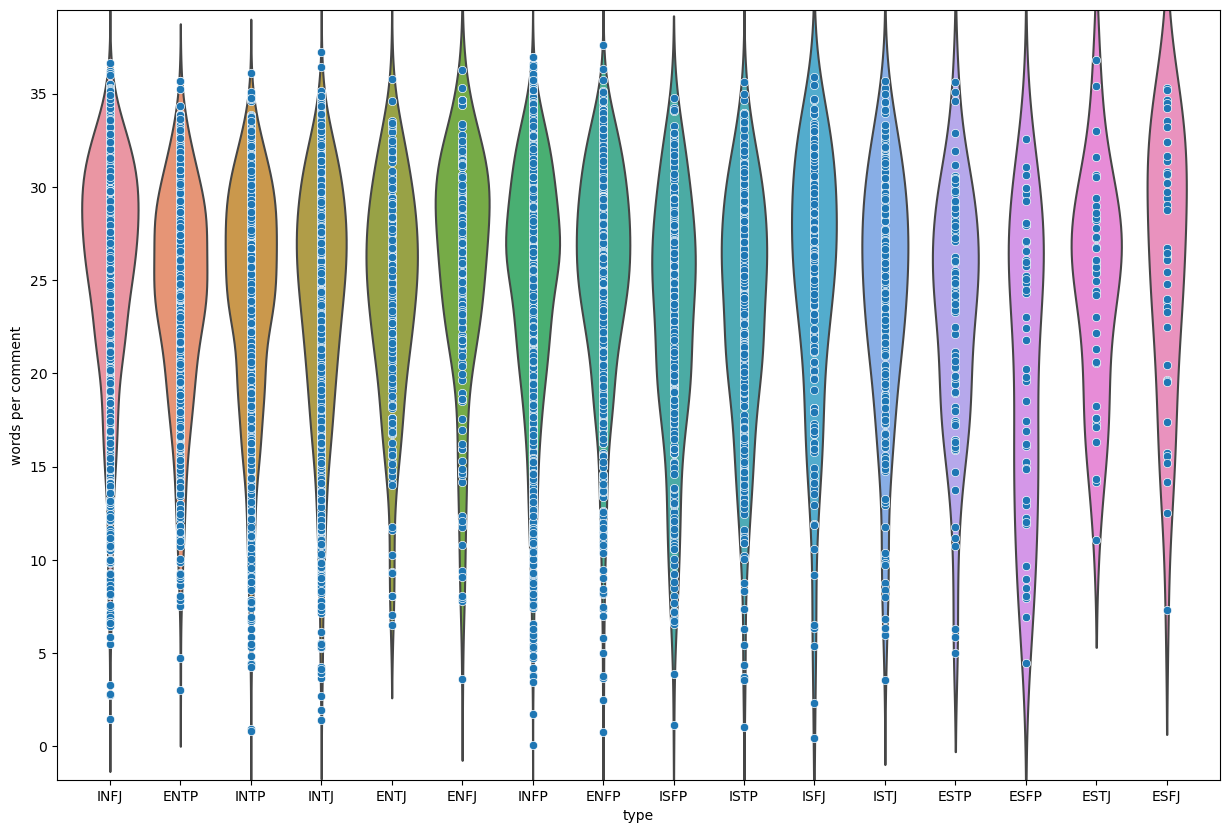

In [68]:
plt.figure(figsize=(15, 10))
sns.violinplot(x='type', y='words per comment', data=data, inner=None, Color='lightgray')
sns.scatterplot(x='type', y='words per comment', data=data)

C:\Users\ojasa\AppData\Local\Temp\ipykernel_34888\3534026255.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")


<AxesSubplot: >

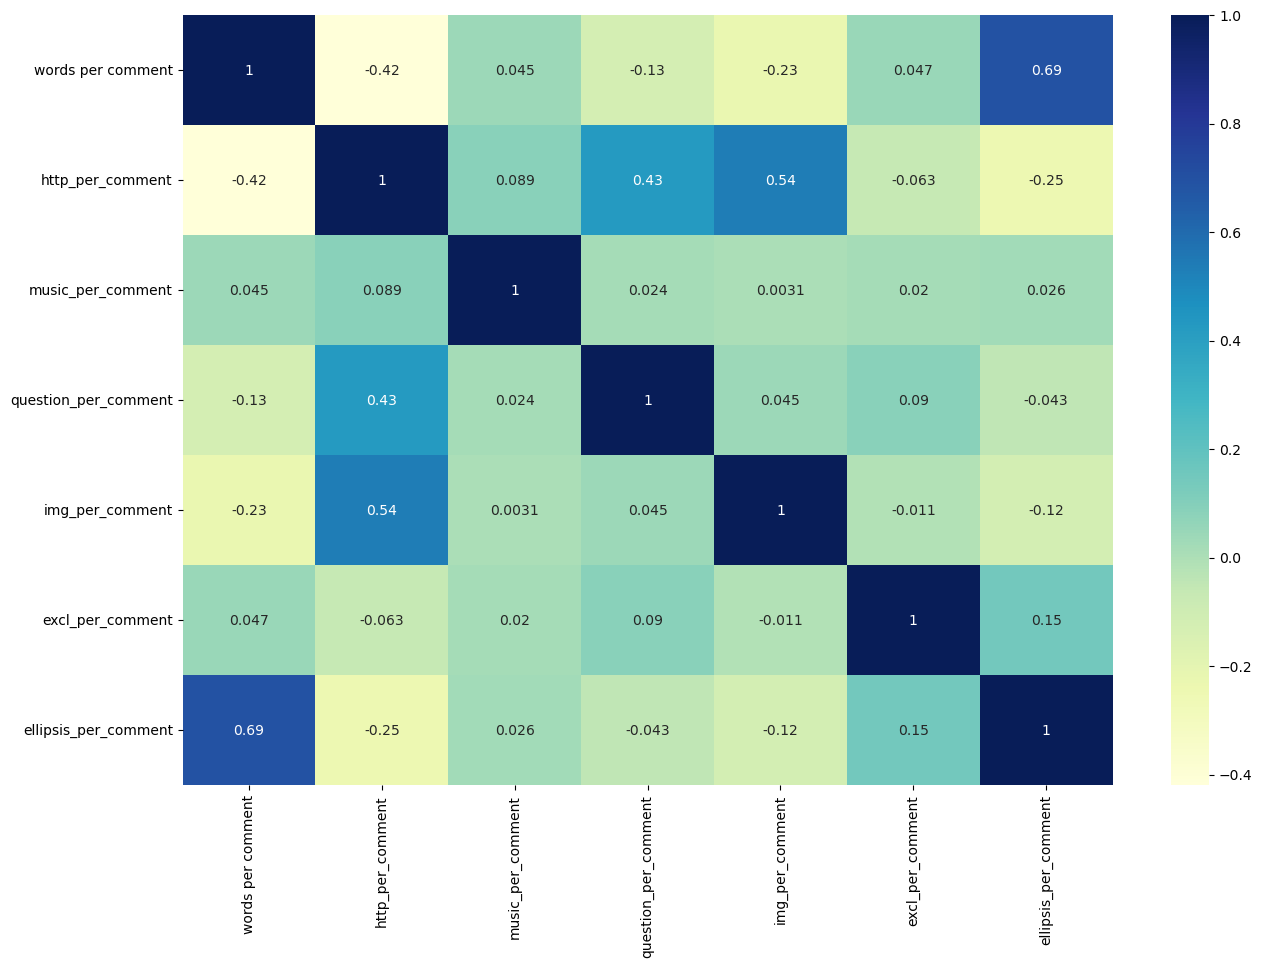

In [69]:
data['http_per_comment'] = data['posts'].apply(lambda x: x.count('http')/50)
data['music_per_comment'] = data['posts'].apply(lambda x: x.count('music')/50)
data['question_per_comment'] = data['posts'].apply(lambda x: x.count('?')/50)
data['img_per_comment'] = data['posts'].apply(lambda x: x.count('jpg')/50)
data['excl_per_comment'] = data['posts'].apply(lambda x: x.count('!')/50)
data['ellipsis_per_comment'] = data['posts'].apply(lambda x: x.count('...')/50)

plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

In [70]:
# we can determine that ellipsis per comment is highly correlated to the words per comment

In [71]:
X = data.drop(['type','posts'], axis=1)
y = data.loc[:, 'type']
X.head()

,words per comment,http_per_comment,music_per_comment,question_per_comment,img_per_comment,excl_per_comment,ellipsis_per_comment
0,11.12,0.48,0.02,0.36,0.12,0.06,0.30
1,23.40,0.20,0.00,0.10,0.02,0.00,0.38
2,16.72,0.10,0.00,0.24,0.00,0.08,0.26
3,21.28,0.04,0.02,0.22,0.00,0.06,0.52
4,19.34,0.12,0.02,0.20,0.04,0.02,0.42


In [72]:
print(X.shape)
print(y.shape)

(8675, 7)
(8675,)


In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=100)

In [74]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [75]:
y_train.head()

817     INFJ
7595    ISTP
7535    INFJ
5889    INFJ
3304    INTP
Name: type, dtype: object

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train_sc, y_train)
acc1 = accuracy_score(logreg.predict(X_test_sc), y_test)
acc1

0.24270353302611367

In [77]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_sc, y_train)
acc2= accuracy_score(knn.predict(X_test_sc), y_test)
acc2

c:\Users\ojasa\.conda\envs\py39gpu\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.15745007680491552

In [78]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(X_train_sc, y_train)
acc3 = accuracy_score(perceptron.predict(X_test_sc), y_test)
acc3

0.1674347158218126

In [79]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp.fit(X_train_sc, y_train)
acc4 = accuracy_score(mlp.predict(X_test_sc), y_test)
acc4

c:\Users\ojasa\.conda\envs\py39gpu\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.22657450076804916

In [80]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_sc, y_train)
acc5 = accuracy_score(rf.predict(X_test_sc), y_test)
acc5

0.20430107526881722

In [81]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_model = SVC()
svm_model.fit(X_train, y_train)
acc6 = accuracy_score(svm_model.predict(X_test_sc), y_test)
acc6

c:\Users\ojasa\.conda\envs\py39gpu\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.20506912442396313

In [82]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier()
adaboost.fit(X_train_sc, y_train)
acc7 = accuracy_score(adaboost.predict(X_test_sc), y_test)
acc7

0.22196620583717358

In [85]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Perceptron',
              'MLP', 'Random Forest', 'SVM', 
              'AdaBoost'],
    'Score': [acc1, acc2, acc3,
              acc4, acc5, acc6, 
              acc7]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,0.242704
3,MLP,0.226575
6,AdaBoost,0.221966
5,SVM,0.205069
4,Random Forest,0.204301
2,Perceptron,0.167435
1,KNN,0.157450


In [ ]:
# we observe that neither model is performing well

In [89]:
# we will now try to classify if the person is introverted or extroverted

map1 = {"I": 0, "E": 1}

data['I-E'] = data['type'].astype(str).str[0]
data['I-E'] = data['I-E'].map(map1)
data.head()

,type,posts,words per comment,http_per_comment,music_per_comment,question_per_comment,img_per_comment,excl_per_comment,ellipsis_per_comment,I-E
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12,0.48,0.02,0.36,0.12,0.06,0.30,0
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40,0.20,0.00,0.10,0.02,0.00,0.38,1
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72,0.10,0.00,0.24,0.00,0.08,0.26,0
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28,0.04,0.02,0.22,0.00,0.06,0.52,0
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34,0.12,0.02,0.20,0.04,0.02,0.42,1


In [91]:
X_1 = data.drop(["type", "posts", "I-E"], axis=1)
y_1 = data.loc[:, "I-E"]

In [92]:
print(X_1.shape)
print(y_1.shape)

(8675, 7)
(8675,)


In [98]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_1, y_1, test_size=0.15, random_state=100)

In [99]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train1_sc = sc.fit_transform(X_train1)
X_test1_sc = sc.transform(X_test1)

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg1 = LogisticRegression()
logreg1.fit(X_train1_sc, y_train1)
acc1 = accuracy_score(logreg1.predict(X_test1_sc), y_test1)
acc1

0.7657450076804916

In [104]:
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier()
knn1.fit(X_train1_sc, y_train1)
acc2 = accuracy_score(knn1.predict(X_test1_sc), y_test1)
acc2

c:\Users\ojasa\.conda\envs\py39gpu\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7127496159754224

In [106]:
from sklearn.linear_model import Perceptron

p1 = Perceptron()
p1.fit(X_train1_sc, y_train1)
acc3 = accuracy_score(p1.predict(X_test1_sc), y_test1)
acc3

0.7580645161290323

In [108]:
from sklearn.neural_network import MLPClassifier

mlp1 = MLPClassifier()
mlp1.fit(X_train1_sc, y_train1)
acc4 = accuracy_score(mlp1.predict(X_test1_sc), y_test1)
acc4

c:\Users\ojasa\.conda\envs\py39gpu\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7672811059907834

In [110]:
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier()
rf1.fit(X_train1_sc, y_train1)
acc5 = accuracy_score(rf1.predict(X_test1_sc), y_test1)
acc5

0.7450076804915514

In [111]:
from sklearn.svm import SVC

svm1 = SVC()
svm1.fit(X_train1_sc, y_train1)
acc6 = accuracy_score(svm1.predict(X_test1_sc), y_test1)
acc6

0.7665130568356375

In [112]:
from sklearn.ensemble import AdaBoostClassifier

ada1 = AdaBoostClassifier()
ada1.fit(X_train1_sc, y_train1)
acc7 = accuracy_score(ada1.predict(X_test1_sc), y_test1)
acc7


0.7657450076804916

In [113]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Perceptron',
              'MLP', 'Random Forest', 'SVM', 
              'AdaBoost'],
    'Score': [acc1, acc2, acc3,
              acc4, acc5, acc6, 
              acc7]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,MLP,0.767281
5,SVM,0.766513
0,Logistic Regression,0.765745
6,AdaBoost,0.765745
2,Perceptron,0.758065
4,Random Forest,0.745008
1,KNN,0.712750


In [ ]:
# 75% is decent accuracy
# now, we will do the hyperparameter tuning for MLP and RFG

In [114]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestClassifier()

param_grid = {
    "n_estimators" : [30, 50, 100, 200],
    "max_features" : [0, 2, 4],
    "min_samples_split" : [2, 4, 6],
    "max_depth" : [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid=param_grid,
                           cv=5, scoring="neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(X_train1_sc, y_train1)

c:\Users\ojasa\.conda\envs\py39gpu\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ojasa\.conda\envs\py39gpu\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ojasa\.conda\envs\py39gpu\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "c:\Users\ojasa\.conda\envs\py39gpu\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 4, 8], 'max_features': [0, 2, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [30, 50, 100, 200]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [115]:
best_rfg = grid_search.best_estimator_
best_rfg

RandomForestClassifier(max_depth=4, max_features=4, min_samples_split=4,
                       n_estimators=50)

In [116]:
print(best_rfg.score(X_train1_sc, y_train1))
best_rfg.score(X_test1_sc, y_test1)

0.7718703377187034


0.7672811059907834

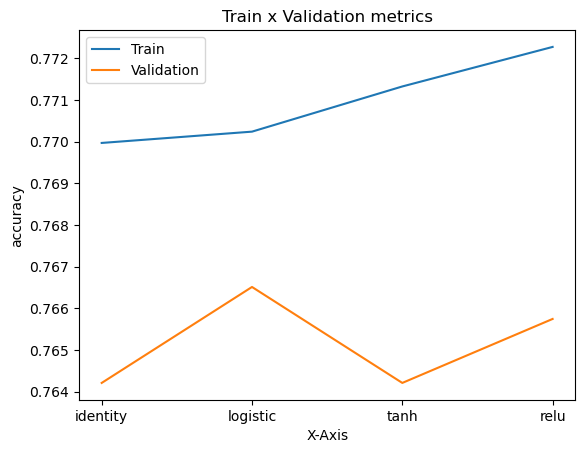

In [118]:
acts = ['identity', 'logistic', 'tanh', 'relu']

accuracy_list_train = []
accuracy_list_test = []

for i in acts:
    model = MLPClassifier(activation=i, random_state=42)
    model.fit(X_train1_sc, y_train1)
    accuracy_list_train.append(accuracy_score(model.predict(X_train1_sc), y_train1))
    accuracy_list_test.append(accuracy_score(model.predict(X_test1_sc), y_test1))


plt.title('Train x Validation metrics')
plt.xlabel('X-Axis')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(acts)),labels=acts)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

In [ ]:
# logistic is the best activation

c:\Users\ojasa\.conda\envs\py39gpu\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


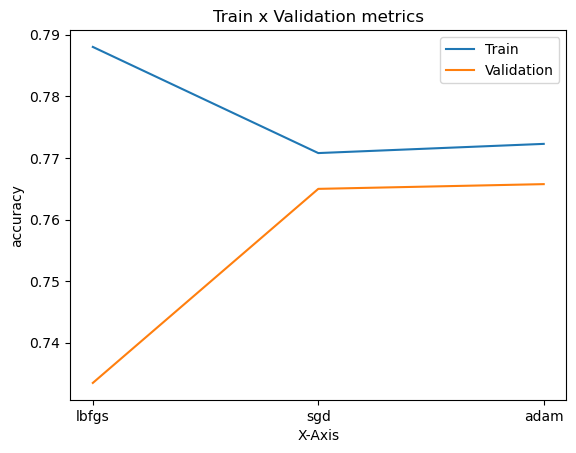

In [120]:
slv = ['lbfgs', 'sgd', 'adam']

accuracy_list_train = []
accuracy_list_test = []

for i in slv:
    model = MLPClassifier(solver=i, random_state=42)
    model.fit(X_train1_sc, y_train1)
    accuracy_list_train.append(accuracy_score(model.predict(X_train1_sc), y_train1))
    accuracy_list_test.append(accuracy_score(model.predict(X_test1_sc), y_test1))


plt.title('Train x Validation metrics')
plt.xlabel('X-Axis')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(slv)),labels=slv)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

In [ ]:
# either sgd or adam works

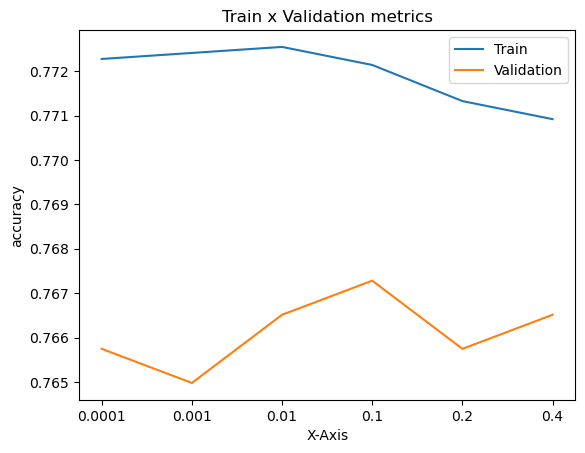

In [123]:
apl = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.4]

accuracy_list_train = []
accuracy_list_test = []

for i in apl:
    model = MLPClassifier(alpha=i, random_state=42)
    model.fit(X_train1_sc, y_train1)
    accuracy_list_train.append(accuracy_score(model.predict(X_train1_sc), y_train1))
    accuracy_list_test.append(accuracy_score(model.predict(X_test1_sc), y_test1))


plt.title('Train x Validation metrics')
plt.xlabel('X-Axis')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(apl)),labels=apl)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

In [ ]:
# 0.1 will be ideal for model

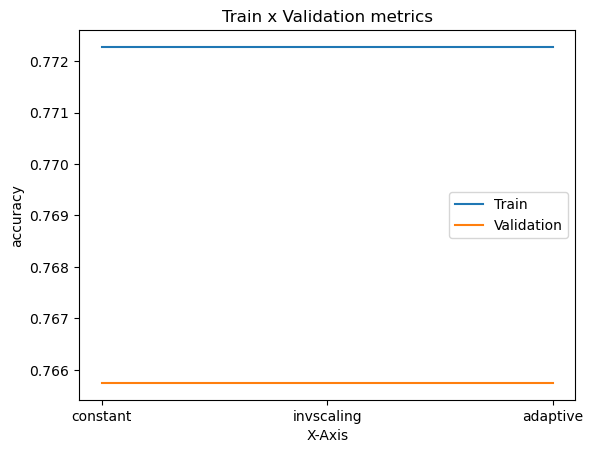

In [122]:
lr = ['constant', 'invscaling', 'adaptive']

accuracy_list_train = []
accuracy_list_test = []

for i in lr:
    model = MLPClassifier(learning_rate=i, random_state=42)
    model.fit(X_train1_sc, y_train1)
    accuracy_list_train.append(accuracy_score(model.predict(X_train1_sc), y_train1))
    accuracy_list_test.append(accuracy_score(model.predict(X_test1_sc), y_test1))


plt.title('Train x Validation metrics')
plt.xlabel('X-Axis')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(lr)),labels=lr)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

In [ ]:
# learing rate method doesnt affect model 

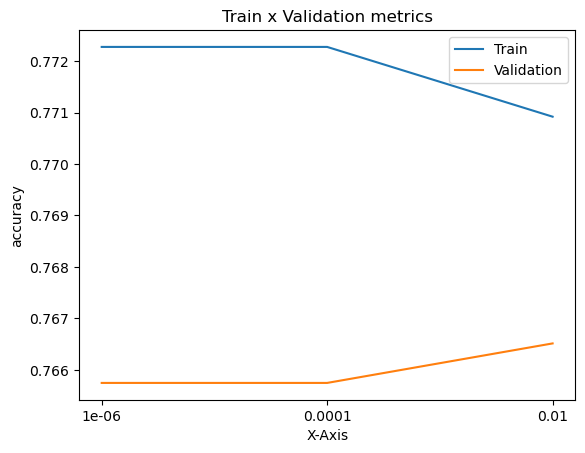

In [124]:
tl = [1e-6, 1e-4, 1e-2,]

accuracy_list_train = []
accuracy_list_test = []

for i in tl:
    model = MLPClassifier(tol=i, random_state=42)
    model.fit(X_train1_sc, y_train1)
    accuracy_list_train.append(accuracy_score(model.predict(X_train1_sc), y_train1))
    accuracy_list_test.append(accuracy_score(model.predict(X_test1_sc), y_test1))


plt.title('Train x Validation metrics')
plt.xlabel('X-Axis')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(tl)),labels=tl)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

In [ ]:
# 0.01 is the best

In [129]:
final_model = MLPClassifier(activation = 'logistic',
    solver = 'adam',
    alpha = 0.1,
    learning_rate = 'constant',
    tol = 0.01, random_state=0)

In [130]:
final_model.fit(X_train1_sc, y_train1)
accuracy_score(final_model.predict(X_test1_sc), y_test1)

0.7665130568356375

In [131]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score


# Generate confusion matrix
cm = confusion_matrix(y_test1, final_model.predict(X_test1_sc))
print("Confusion Matrix:")
print(cm)

# Calculate accuracy
accuracy = accuracy_score(final_model.predict(X_test1_sc), y_test1)
print("\nAccuracy:", accuracy)

# Calculate precision
precision = precision_score(final_model.predict(X_test1_sc), y_test1, average='macro')
print("\nPrecision:", precision)

# Calculate recall
recall = recall_score(final_model.predict(X_test1_sc), y_test1, average='macro')
print("\nRecall:", recall)

# Generate classification report
report = classification_report(final_model.predict(X_test1_sc), y_test1)
print("\nClassification Report:")
print(report)

Confusion Matrix:
[[994   5]
 [299   4]]

Accuracy: 0.7665130568356375

Precision: 0.5040981575635041

Recall: 0.6065996390822377

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.77      0.87      1293
           1       0.01      0.44      0.03         9

    accuracy                           0.77      1302
   macro avg       0.50      0.61      0.45      1302
weighted avg       0.99      0.77      0.86      1302



In [140]:
ids = [0]

In [161]:
# below is an introverted tweet, lets see if the model is able to classify it accuractely"

testpost =  "Finally summer holidays... Time to but some video games and novels! Lets see if the new season of jjk is out yet or not !"

testdf  = pd.DataFrame({
    "ID" : ids,
    "posts" : testpost
})

testdf.head()

,ID,posts
0,0,Finally summer holidays... Time to but some vi...


In [162]:
testdf["words per comment"] = testdf["posts"].apply(lambda x: len(x.split())/50)
testdf.head()

,ID,posts,words per comment
0,0,Finally summer holidays... Time to but some vi...,0.5


In [163]:
testdf['http_per_comment'] = testdf['posts'].apply(lambda x: x.count('http')/50)
testdf['music_per_comment'] = testdf['posts'].apply(lambda x: x.count('music')/50)
testdf['question_per_comment'] = testdf['posts'].apply(lambda x: x.count('?')/50)
testdf['img_per_comment'] = testdf['posts'].apply(lambda x: x.count('jpg')/50)
testdf['excl_per_comment'] = testdf['posts'].apply(lambda x: x.count('!')/50)
testdf['ellipsis_per_comment'] = testdf['posts'].apply(lambda x: x.count('...')/50)

In [164]:
test_data = testdf.drop(["posts", "ID"], axis=1)
test_data.head()

,words per comment,http_per_comment,music_per_comment,question_per_comment,img_per_comment,excl_per_comment,ellipsis_per_comment
0,0.5,0.0,0.0,0.0,0.0,0.04,0.02


In [165]:
test_data_sc = sc.transform(test_data)

In [167]:
preds = final_model.predict(test_data_sc)

In [168]:
# since we mapped introverted to 0 and extroverted to 1

for i in preds: print("Introverted" if i == 0 else "Extroverted")

Introverted
